**Ankit Sekseria**<br>
**D19005**<br>
**Varishu Pant**<br>
**D19033**

## Question 6:
1.	List down some of the issues in cluster analysis. 
2.	What are the advantages and limitations of Hierarchical cluster analysis?
3.	What are the advantages and limitations of K-Means clustering?
Try to support this with simulated (or real) data as much as possible.


In [3]:
import pandas as pd  #importing libraries
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy as hi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import time
from sklearn.datasets import make_circles,make_blobs,make_moons,make_regression

## Issues in Cluster Analysis

### 1.Identification of distance measure :
For numerical attributes, distance measures that can be used
are standard equations like eucledian,manhattan, and
maximum distance measure.All the three are special cases
of Minkowski distance .But identification of measure for
categorical attributes is difficult. 

We generate random clusters and try to fit agglomerative clustering model using 3 kinds of affinity metrics to compare results.

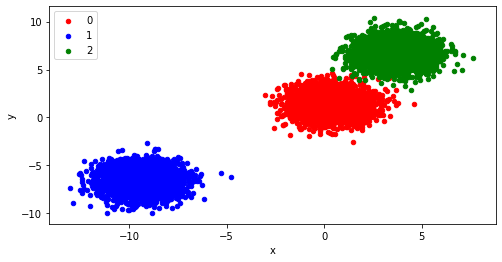

In [6]:
plt.rcParams['figure.figsize'] = [8, 4]
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=101)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

In [7]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
euc_clusters=cluster.fit_predict(X)
cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')  
man_clusters=cluster.fit_predict(X)
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  
cos_clusters=cluster.fit_predict(X)

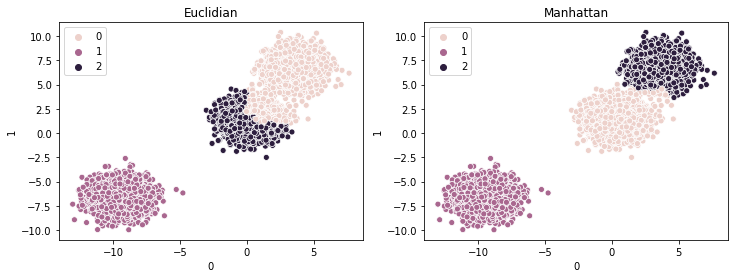

In [8]:
plt.rcParams['figure.figsize'] = [12,4]

fig, axes = plt.subplots(1, 2)
axes[0].set_title('Euclidian')
axes[1].set_title('Manhattan')

sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=euc_clusters,ax=axes[0])
sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=man_clusters,ax=axes[1])

plt.show()

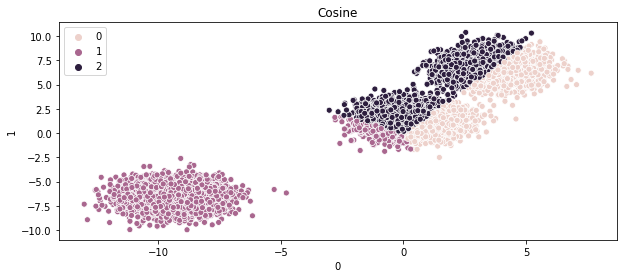

In [9]:
plt.rcParams['figure.figsize'] = [10,4]

sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=cos_clusters)
plt.title('Cosine')
plt.show()

**Observation-**
Results are different for all 3 metrics and finding the one for your business case is a hassle .This becomes way more difficult if variables are categorical.

### 2.The number of clusters :
Identifying the number of
clusters is a difficult task if the number of class labels is
not known beforehand.A careful analysis of number of
clusters is necessary to produce correct results.Else, it is
found that heterogenous tuples may merge or similar
tuples may be broken into many.This could be catastrophic
if the approach used is hierarchical because in hierarchical
approach, if a tuple gets wrongly merged in a cluster that
action cannot be undone.
While there is no perfect way to determine the number of
Clusters, there are some statistics that can be analyzed to
help in the process. These are the Pseudo-F
statistic, the Cubic Clustering Criterion(CCC), and the
Approximate Overall R-Squared

We'll see more of it under **Choosing k manually** section under **Disadvantages of K-Means**

### 3.Structure of database:   
Real life data may not always
contain clearly identifiable clusters.Also the order in which
the tuples are arranged may affect the results when an
algorithm is executed if the distance measure used is not
perfect.With a structureless data(for eg. Having lots of
missing values), even identification of appropriate number
of clusters will not yield good results.


Number of observations: 100


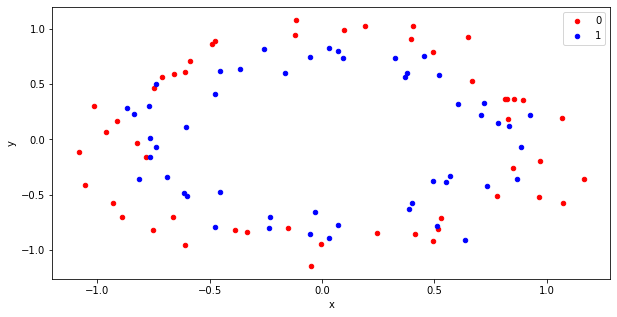

In [14]:
X, y = make_circles(n_samples=100,noise=0.1,random_state=101)
print('Number of observations:',X.shape[0])
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

In [259]:
kmeans_sel = KMeans(init='random',n_clusters=2,n_init=100, random_state=101)
k_clusters=kmeans_sel.fit_predict(X)
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
agg_clusters=cluster.fit_predict(X)

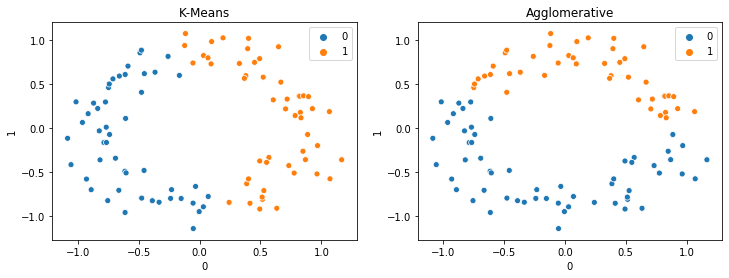

In [260]:
plt.rcParams['figure.figsize'] = [12,4]

fig, axes = plt.subplots(1, 2)
axes[0].set_title('K-Means')
axes[1].set_title('Agglomerative')

sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=k_clusters,ax=axes[0])
sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=agg_clusters,ax=axes[1])

plt.show()

**Observation-**

We generated circular data for which both Agglomerative and Hierarchial clustering fails.

### 4.Types of attributes in a database:
The databases may not
necessarily contain distinctively numerical or categorical
attributes.They may also contain other types like
nominal,ordinal,binary etc.So these attributes have to be
converted to categorical type to make calculations simple. 

In [261]:
credit_data = pd.read_csv(r'D:\Praxis docs\Excel\german_credit_data.csv')

In [262]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [275]:
credit_data.drop('Unnamed: 0',axis=1,inplace=True)

In [271]:
credit_data.dropna(inplace=True)

#### About the Data:  
In this dataset, each entry represents a person who takes a credit by a bank.The attributes are:

Age (numeric)  
Sex (text: male, female)  
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing (text: own, rent, or free)  
Saving accounts (text - little, moderate, quite rich, rich)  
Checking account (numeric, in DM - Deutsch Mark)  
Credit amount (numeric, in DM)  
Duration (numeric, in month)  
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)  

#### Source- https://www.kaggle.com/uciml/german-credit

In this data,Job,Savings Accounts and Checking accounts are ordinal variables.
Purpose, Housing are multiclass nominal variable. Sex is a binary nominal variable.
Age,Credit amount and Duration are numerical variables.
Since K-Means won't work for categorical variables, we use K-modes for them and cluster them separately.

In [278]:
num_vars=['Age','Credit amount','Duration']
cat_vars=[var for var in credit_data.columns if var not in num_vars]

In [330]:
data_num=credit_data[num_vars]
data_cat=credit_data[cat_vars]

In [265]:
from kmodes.kmodes import KModes

In [284]:
kmodes_sel=KModes(n_clusters=3,n_init=100,random_state=101)
kmeans_sel= KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)

In [285]:
clust_cat=kmodes_sel.fit_predict(data_cat)
clust_num=kmeans_sel.fit_predict(data_num)

##### INTERPRETING CLUSTERS

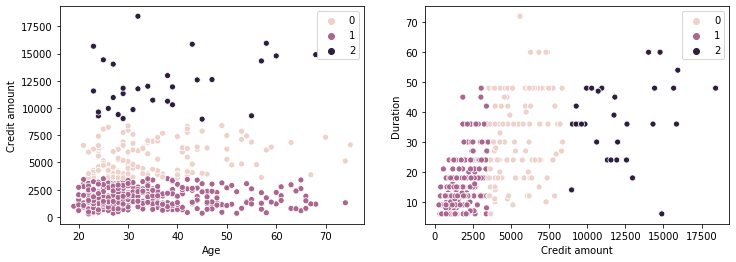

In [339]:
plt.rcParams['figure.figsize'] = [12,4]

fig, axes = plt.subplots(1, 2)

sns.scatterplot(x=data_num.iloc[:,0], y =data_num.iloc[:,1],hue=clust_num,ax=axes[0])
sns.scatterplot(x=data_num.iloc[:,1], y =data_num.iloc[:,2],hue=clust_num,ax=axes[1])
plt.show()

In [317]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,0]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Sex,female,male
Cluster 0,78,292
Cluster 1,87,24
Cluster 2,3,38


In [318]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,1]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Job,0,1,2,3
Cluster 0,10,53,263,44
Cluster 1,3,58,34,16
Cluster 2,1,5,16,19


In [319]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,2]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Housing,free,own,rent
Cluster 0,50,244,76
Cluster 1,9,76,26
Cluster 2,6,29,6


In [320]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,3]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Saving accounts,little,moderate,quite rich,rich
Cluster 0,313,26,15,16
Cluster 1,89,12,5,5
Cluster 2,10,26,3,2


In [321]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,4]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Checking account,little,moderate,rich
Cluster 0,233,99,38
Cluster 1,12,86,13
Cluster 2,0,39,2


In [322]:
hm=pd.DataFrame(pd.crosstab(index=clust_cat,columns=data_cat.iloc[:,5]))
hm.index=['Cluster 0',"Cluster 1",'Cluster 2']
hm.style.background_gradient(cmap='coolwarm').set_precision(2)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Cluster 0,24,158,6,19,75,78,7,3
Cluster 1,11,10,0,7,27,48,6,2
Cluster 2,18,5,0,2,5,6,1,4


**Observation-**
In such cases ,clusters formed may be different for numerical variables and categorical variables which makes it harder to interpret the truth or the actual common observations in the original data.

### Choosing the initial clusters :  
We find that most of the algorithms mention k initial clusters to
be randomly chosen.A careful and comprehensive study of
data is required for the same. Also, if the intial clusters are
not properly chosen, then after a few iterations it is found
that clusters may even be left empty.

We fit 4 k-means models ,each with number of iterations as 1 and having different random states to simulate different starting centroids.

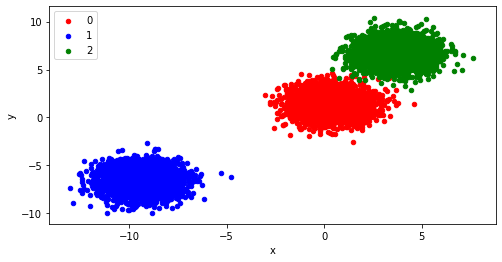

In [22]:
plt.rcParams['figure.figsize'] = [8, 4]
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=101)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

In [48]:
kmeans_sel = KMeans(init='random',n_clusters=3,n_init=1, random_state=10)
rand_0_clusters=kmeans_sel.fit_predict(X)
kmeans_sel = KMeans(init='random',n_clusters=3,n_init=1, random_state=5)
rand_1_clusters=kmeans_sel.fit_predict(X)
kmeans_sel = KMeans(init='random',n_clusters=3,n_init=1, random_state=200)
rand_2_clusters=kmeans_sel.fit_predict(X)
kmeans_sel = KMeans(init='random',n_clusters=3,n_init=1, random_state=2)
rand_3_clusters=kmeans_sel.fit_predict(X)

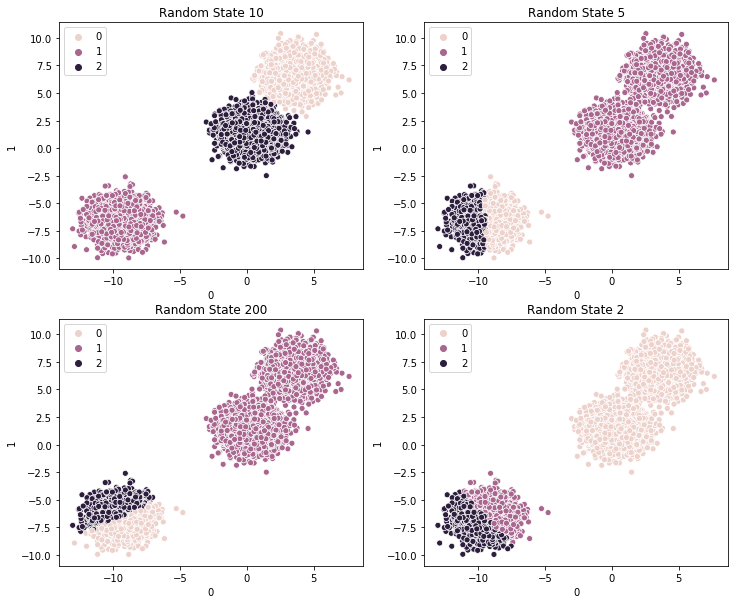

In [50]:
plt.rcParams['figure.figsize'] = [12, 10]

fig, axes = plt.subplots(2, 2)
axes[0][0].set_title('Random State 10')
axes[0][1].set_title('Random State 5')
axes[1][0].set_title('Random State 200')
axes[1][1].set_title('Random State 2')

sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=rand_0_clusters,ax=axes[0][0])
sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=rand_1_clusters,ax=axes[0][1])
sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=rand_2_clusters,ax=axes[1][0])
sns.scatterplot(x=X.iloc[:,0], y =X.iloc[:,1],hue=rand_3_clusters,ax=axes[1][1])

plt.show()

**Observation-**  
We see that random initializations of initial centroids can disastrously affect the results.
Although using smart initializations (k-means ++) can mitigate this problem to some extent.
For small values of k, this problem can be mitigated by setting a large number of iterations as the model parameter.

## Advantages of Hierarchial Clustering


-  Handy to club different data-points:  
    Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informative	than the	unstructured	set	of	flat	clusters	returned	by	k-means.	Therefore,	it	is	easier	to	decide on the	number	of	clusters	by	looking	at	the	dendrogram.
- Easy	to	implement	
-     Hierarchical clustering algorithms are more versatile.

### Informative Hierarchy using a Dendrogram

In [ ]:
plt.rcParams['figure.figsize'] = [10, 4]
X, y = make_blobs(n_samples=25, centers=3, n_features=2,random_state=101)
dist_mat=hi.linkage(X, method  = "complete",metric='euclidean',optimal_ordering=True)
dendrogram = hi.dendrogram(dist_mat)
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.axhline(y=12.5, color='r', linestyle='--')
plt.ylabel('Euclidean distances')
plt.show()

**Observation-**
To determine the cutting section, various methods can be used. The first method, empirically, this method should be based on knowledge of researcher. For example, the existing cluster based on appearance differences, can be divided into two or three groups.
The second method uses a statistical convention. The dendrogram can be cut where the difference is most significant. Another technique is to use the square root of the number of individuals. Another technique is to use at least 70% of the distance between the two groups. The next method is to use the function discrimination and classification based on discrimination function.
Finally, the cluster method does not differ, and can be separate groups, and the use of each method depends on your purpose.
For example, here we cut the dendrogram to get 2 clusters based on the second method.

### Versatility

With k-Means clustering, you need to have a sense ahead-of-time what your desired number of clusters is.Also, k-means will often give unintuitive results if  
(a) your data is not well-separated into sphere-like clusters,  
(b) you pick a 'k' not well-suited to the shape of your data, i.e. you pick a value too high or too low, or  
(c) you have weird initial values for your cluster centroids (one strategy is to run a bunch of k-means algorithms with random starting centroids and take some common clustering result as the final result).  
In contrast, hierarchical clustering has fewer assumptions about the distribution of your data - the only requirement (which k-means also shares) is that a distance can be calculated each pair of data points. Hierarchical clustering typically 'joins' nearby points into a cluster, and then successively adds nearby points to the nearest group. You end up with a 'dendrogram', or a sort of connectivity plot. You can use that plot to decide after the fact of how many clusters your data has, by cutting the dendrogram at different heights. Of course, if you need to pre-decide how many clusters you want (based on some sort of business need) you can do that too. Hierarchical clustering can be more computationally expensive but usually produces more intuitive results.

## Disavantages	
- It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a
    cluster,	they	can	no	longer	be	moved	around.
- Can handle only few data-points and takes exponential time for the high number of observations.
- The	order	of	the	data	has	an	impact	on	the	final	results	
- Very	sensitive	to	outliers
- Time Complexity and Space Complexity:  
  Time complexity = O(n³) where n is the number of data points.  
  Space complexity = O(n²) where n is the number of data points.

### Time Complexity

Number of observations: 10000


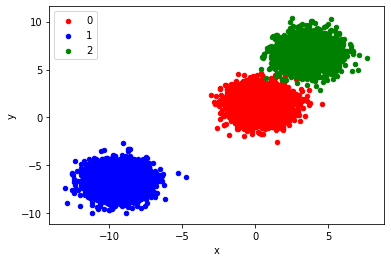

In [109]:
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=101)
print('Number of observations:',X.shape[0])
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

In [111]:
X_small=X.sample(100)
print('Number of observations:',X_small.shape[0])

Number of observations: 100


In [112]:
start_time=time.time()
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
clusters=cluster.fit_predict(X_small)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 1.9984245300292969  ms


In [110]:
start_time=time.time()
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
clusters=cluster.fit_predict(X)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 2810.6236457824707  ms


**Observation-**
As the number of observations increased ,the time taken increased exponentially.

### Sensitive to outliers

#### Generating Data

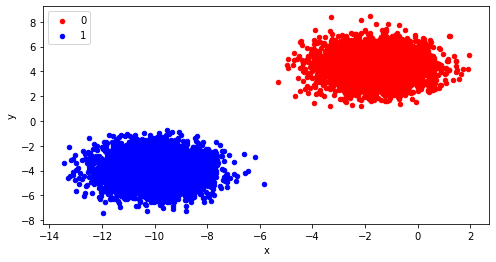

In [54]:
X1, y1 = make_blobs(n_samples=10000, centers=2, n_features=2,random_state=1)
df = pd.DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

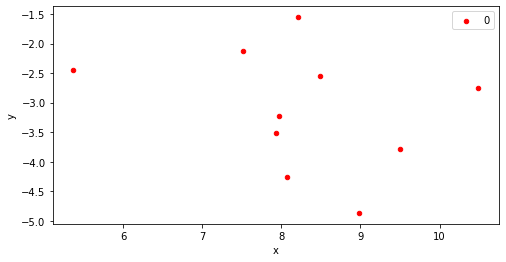

In [52]:
X2, y2 = make_blobs(n_samples=10, centers=1, n_features=2,random_state=6)
df = pd.DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

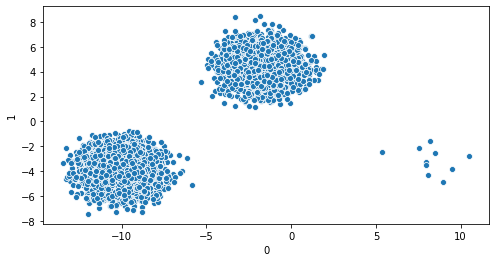

In [58]:
X=pd.concat([pd.DataFrame(X1),pd.DataFrame(X2)])
y=pd.concat([pd.DataFrame(y1),pd.DataFrame(y2)])
sns.scatterplot(X.iloc[:,0],X.iloc[:,1])
plt.show()

#### Testing model

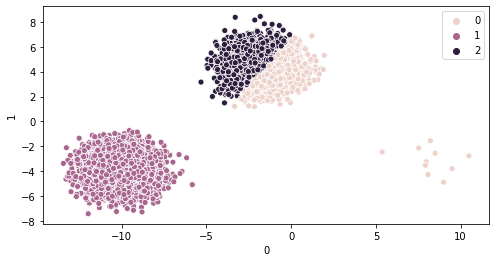

In [57]:
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)
clusters=kmeans_sel.fit_predict(X)
sns.scatterplot(X.iloc[:,0],X.iloc[:,1],hue=clusters)
plt.show()

**Observation-**
We see that when trying to clsuter data with outliers ,k-means gives incorrect clusters. In other words, the correct results would have shown outliers getting clustered together in one cluster while the two other clearly separated blobs would have been their own clusters, which is not the case here.

## K-Means
### Advantages

- Scales to large data sets.  
    Time complexity is O(nkl), where n is the number of patterns, k is the number of clusters, and l is the number of iterations taken by the algorithm to converge.  
    Its space complexity is O(k+n). It requires additional space to store the data matrix.It is order-independent; for a given initial seed set of cluster centers, it generates the same partition of the data irrespective of the order in which the patterns are presented to the algorithm.
-    With	a	large	number	of	variables,	K-Means	may	be	computationally	faster	than	
        hierarchical	clustering	(if	K	is	small).	
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.
- Embedded flexibility regarding a level of granularity.
- An	instance	can	change	cluster	(move	to	another	cluster)	when	the	centroids	are	recomputed.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.


### Time Complexity

Number of observations: 10000


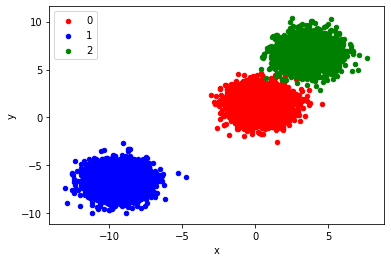

In [4]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=101)
print('Number of observations:',X.shape[0])
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

In [115]:
X_small=X.sample(100)
print('Number of observations:',X_small.shape[0])

Number of observations: 100


In [116]:
start_time=time.time()
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)
clusters=kmeans_sel.fit_predict(X_small)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 91.75896644592285  ms


In [114]:
start_time=time.time()
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)
clusters=kmeans_sel.fit_predict(X)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 284.91663932800293  ms


**Observation-**
As the number of observations increased ,the time taken increased but not by a large amount. Way better than Hierarchial Clustering.

### Faster than hierarchial for large number of variables

In [2]:
X, y = make_blobs(n_samples=10000, centers=3, n_features=100,random_state=101)

In [3]:
start_time=time.time()
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=101)
clusters=kmeans_sel.fit_predict(X)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 4862.96534538269  ms


In [4]:
start_time=time.time()
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
clusters=cluster.fit_predict(X)
end_time=time.time()
runtime=end_time-start_time
print('Time taken:',runtime*1000,' ms')

Time taken: 16232.070684432983  ms


**Observation-**
For a dataset with 100 variables ,the time taken was small for K-means relative to Hierarchial Clustering.

### Generalizes to clusters of different shapes such as elliptical clusters

In [9]:
ellip_data=pd.read_csv(r'D:\Praxis docs\MI\elliptical_data.csv')

In [11]:
ellip_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Weight,Height
0,0,0,0,67.062924,176.086355
1,1,1,1,68.804094,178.388669
2,2,2,2,60.930863,170.284496
3,3,3,3,59.733843,168.691992
4,4,4,4,65.431230,173.763679


In [10]:
ellip_data=ellip_data[['Weight','Height']]
ellip_data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


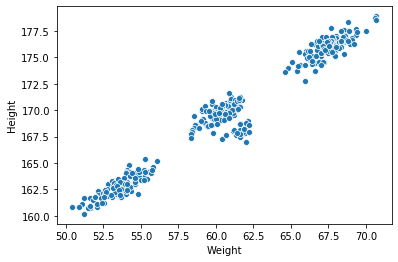

In [15]:
# plt.rcParams['figure.figsize'] = [10, 5]
sns.scatterplot(ellip_data['Weight'],ellip_data['Height'])
plt.show()

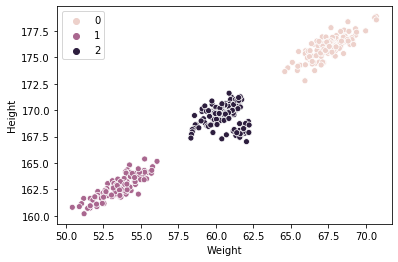

In [16]:
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=10)
clusters=kmeans_sel.fit_predict(ellip_data)
sns.scatterplot(ellip_data['Weight'],ellip_data['Height'],hue=clusters)
plt.show()

**Observation-**

We observe from the plot above that K-means clustered elliptical data well.

### Disadvantages

- Changing the process in between to club data-points to the second best cluster is not possible. Hence, the method is much   more rigid when compared to  Hierarchical Clustering.

- Senstive	to	scale:	rescaling	your	datasets	(normalization	or	standardization)	will	
    completely	change	results.	While	this	itself	is	not	bad,	not	realizing	that	you	have	to	
    spend	extra	attention(to	scaling	your	data	might	be	bad).
- Choosing k manually.
    Use the “Within sum of squares error vs. Clusters” plot to find the optimal (k) may not be intuitive or correct at times.
- Being dependent on initial values.
For a low value of k, you can mitigate this dependence by running k-means several times with different initial values and picking the best result. As k increases, you need advanced versions of k-means to pick better values of the initial centroids (called k-means seeding).
- Clustering data of varying sizes and density.
k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you may need density based algorithms such as DBSCAN.
- Clustering outliers.
Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. We have to consider removing or clipping outliers before clustering.
- Scaling with number of dimensions.
As the number of dimensions increase, a distance-based similarity measure converges to a constant value between any given examples. We need to reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm to get correct results.

### Clustering data of varying sizes and densities

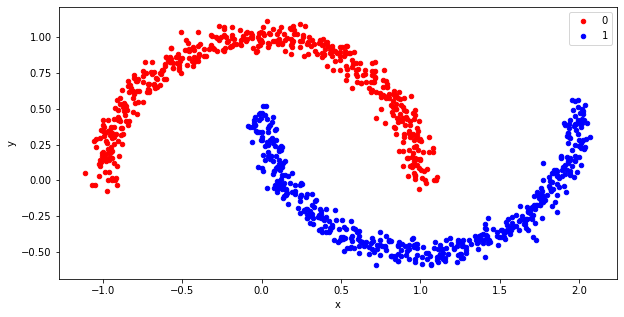

In [5]:
# generate 2d classification dataset
plt.rcParams['figure.figsize'] = [10, 5]
X, y = make_moons(n_samples=1000, noise=0.05,random_state=101)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

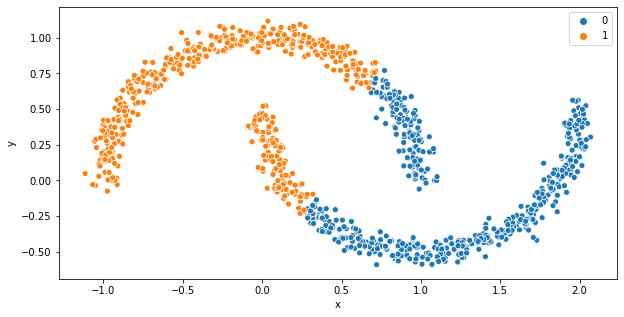

In [6]:
kmeans_sel = KMeans(init='k-means++',n_clusters=2,n_init=100)
clusters=kmeans_sel.fit_predict(X)
sns.scatterplot(x=df.iloc[:,0], y =df.iloc[:,1],hue=clusters)
plt.show()

**Observation-**
We see that K-means failed to cluster moon shaped data properly.

## Choosing k manually

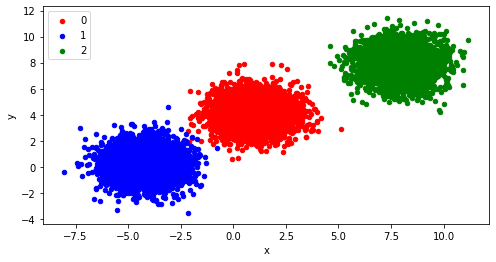

In [25]:
plt.rcParams['figure.figsize'] = [8, 4]
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=3)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

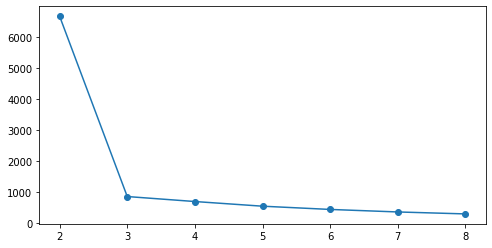

In [26]:
#Plotting Scree Plot to find optimum number of clusters
clusters_range = [2,3,4,5,6,7,8]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100, random_state=101).fit(ellip_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.show()

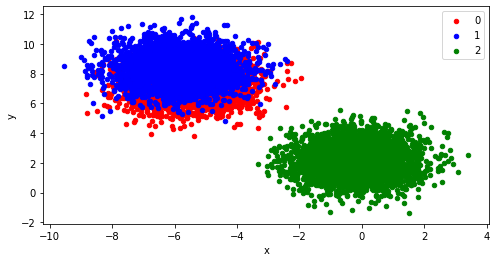

In [22]:
plt.rcParams['figure.figsize'] = [8, 4]
X, y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=5)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X=pd.DataFrame(X)

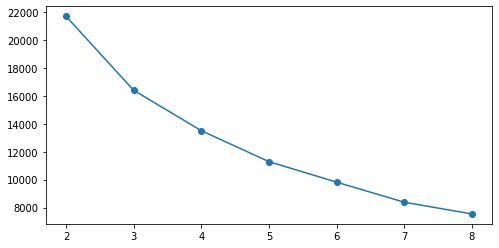

In [23]:
#Plotting Scree Plot to find optimum number of clusters
clusters_range = [2,3,4,5,6,7,8]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100, random_state=101).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.show()

**Observation-**
When using Scree plots for the first data where clusters were well separated, we get optimal clusters as 3 but when used for second data, the plot is not intuitive as there is not a single value of k with huge drop in WSS making it harder to pick optimal k.(which should be 3)